In [1]:
# import libraries -- copied from assignment 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC

In [3]:
# read in data and print head 

manhattan = pd.read_csv('../data/manhattan.csv')
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [6]:
# check length of data and number of features (excluding target)

shape = manhattan.shape

print('There are,', shape[0], 'data rows and ', shape[1] -1 , 'features in the dataset')

There are, 3539 data rows and  17 features in the dataset


## __Initial Data Exploration:__

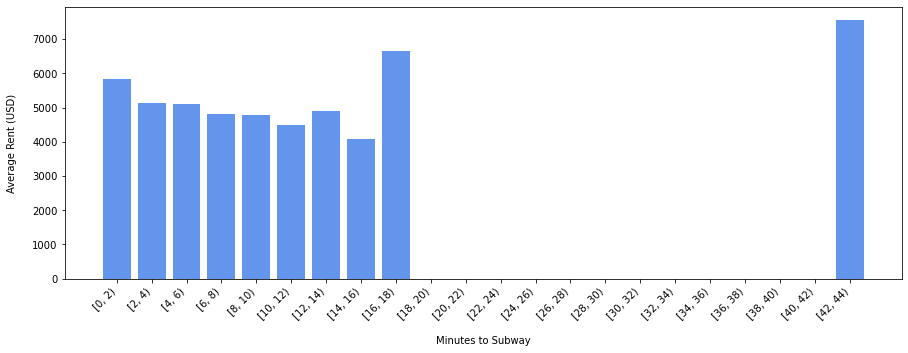

In [ ]:
# First, look at subway time and average rent, binning subway time into 2 minute intervals

# Bin 'min_to_subway' into 5-minute intervals
dt = 2 # binning interval
subway_bins = np.arange(0, manhattan['min_to_subway'].max() + dt, dt) 
manhattan['subway_bin'] = pd.cut(manhattan['min_to_subway'], bins=subway_bins, right=False)

# Calculate mean rent for each subway time bin
avg_rent = manhattan.groupby(['subway_bin'])['rent'].mean().reset_index()

# Set labels for subway time bins
labels = [f"{row.subway_bin}" for row in avg_rent.itertuples(index=False)]

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(avg_rent.index, avg_rent['rent'], color="cornflowerblue")  # Use default index
plt.axhline(0, color="black", linewidth=1)

plt.xlabel("Minutes to Subway", labelpad=15)
plt.ylabel("Average Rent (USD)", labelpad=15)
plt.xticks(ticks=avg_rent.index, labels=labels, rotation=45, ha='right')

plt.show()

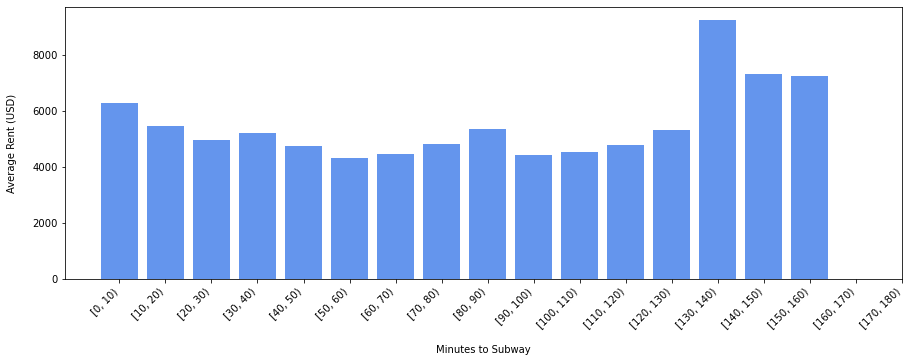

In [17]:
# Second, look at building age and average rent, binning age into 10 year intervals

# Bin 'building_age_yrs' into 10-year intervals
dt = 10  # binning interval
age_bins = np.arange(0, manhattan['building_age_yrs'].max() + dt, dt)
manhattan['age_bins'] = pd.cut(manhattan['building_age_yrs'], bins=age_bins, right=False)

# Calculate mean rent for each subway time bin
avg_rent = manhattan.groupby(['age_bins'])['rent'].mean().reset_index()

# Set labels for subway time bins
labels = [f"{row.age_bins}" for row in avg_rent.itertuples(index=False)]

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(avg_rent.index, avg_rent['rent'], color="cornflowerblue")  # Use default index
plt.axhline(0, color="black", linewidth=1)

plt.xlabel("Minutes to Subway", labelpad=15)
plt.ylabel("Average Rent (USD)", labelpad=15)
plt.xticks(ticks=avg_rent.index, labels=labels, rotation=45, ha='right')

plt.show()

In [ ]:
# set target and drop the rental_id feature, since it is not needed for the model 

